In [1]:
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from math import sqrt
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('index2018.csv')
df=data.copy()
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [3]:
df['date']=pd.to_datetime(df['date'],dayfirst=True)
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [4]:
df.set_index('date',inplace=True)
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [5]:
df=df.asfreq('b')

In [6]:
df.isnull().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [7]:
df['spx']=df['spx'].fillna(method='ffill')


In [8]:
df['ftse']=df['ftse'].fillna(method='bfill')

In [9]:
df['dax']=df['dax'].fillna(df['dax'].mean())

In [10]:
df['market_value']=df['ftse']
del df['ftse']
df.head()

,spx,dax,nikkei,market_value
date,,,,
1994-01-07,469.90,2224.95,18124.01,3445.98
1994-01-10,475.27,2225.00,18443.44,3440.58
1994-01-11,474.13,2228.10,18485.25,3413.77
1994-01-12,474.17,2182.06,18793.88,3372.02
1994-01-13,472.47,2142.37,18577.26,3360.01


In [11]:
df.isnull().sum()

spx             0
dax             0
nikkei          8
market_value    0
dtype: int64

## ARIMA(1,1,1)

In [12]:
model_ar1_i1_ma1=ARIMA(df.market_value,order=(1,1,1))
results_ar1_i1_ma1=model_ar1_i1_ma1.fit()
results_ar1_i1_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 6276
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34417.629
Method:                       css-mle   S.D. of innovations             58.269
Date:                Tue, 01 Feb 2022   AIC                          68843.257
Time:                        13:13:35   BIC                          68870.235
Sample:                    01-10-1994   HQIC                         68852.605
                         - 01-29-2018                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6751      0.581      1.161      0.246      -0.464       1.815
ar.L1.D.market_value     0.8343      0.077     10.770      0.000       0.682       0.986
ma.L1.D.market_value    -0.8690      0.070    -12.452      0.000      -1.006      -0.732
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1987           +0.0000j            1.1987            0.0000
MA.1            1.1507           +0.0000j            1.1507            0.0000
-----------------------------------------------------------------------------
"""

In [13]:
## arima(1,1,1) for prices is quite similar to arma(1,1) for returns

## Residuals for ARIMA(1,1,1)

In [14]:
df['res_ar1_i1_ma1']=results_ar1_i1_ma1.resid

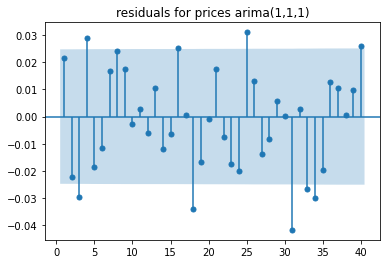

In [15]:
sgt.plot_acf(df.res_ar1_i1_ma1[1:],zero=False,lags=40)
plt.title('residuals for prices arima(1,1,1)')
plt.show()

In [16]:
## since 3 and 4 lag are highly significant so we we will incorporate high lag arima model

## Higher lag ARIMA models

In [17]:
def llr_test(mod_1,mod_2,DF=1):
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR=(2*(L2-L1))
    P=chi2.sf(LR,DF).round(3)
    return P

In [18]:
model_ar1_i1_ma2=ARIMA(df.market_value,order=(1,1,2))
results_ar1_i1_ma2=model_ar1_i1_ma2.fit()
model_ar1_i1_ma3=ARIMA(df.market_value,order=(1,1,3))
results_ar1_i1_ma3=model_ar1_i1_ma3.fit()
model_ar2_i1_ma1=ARIMA(df.market_value,order=(2,1,1))
results_ar2_i1_ma1=model_ar2_i1_ma1.fit()
model_ar3_i1_ma1=ARIMA(df.market_value,order=(3,1,1))
results_ar3_i1_ma1=model_ar3_i1_ma1.fit()
model_ar3_i1_ma2=ARIMA(df.market_value,order=(3,1,2))
results_ar3_i1_ma2=model_ar3_i1_ma2.fit(start_ar_lags=5)

In [19]:
print('arima(1,1,1):', results_ar1_i1_ma1.llf ,results_ar1_i1_ma1.aic)
print('arima(1,1,2):', results_ar1_i1_ma2.llf ,results_ar1_i1_ma2.aic)
print('arima(1,1,3):', results_ar1_i1_ma3.llf ,results_ar1_i1_ma3.aic)
print('arima(2,1,1):', results_ar2_i1_ma1.llf ,results_ar2_i1_ma1.aic)
print('arima(3,1,1):', results_ar3_i1_ma1.llf ,results_ar3_i1_ma1.aic)
print('arima(3,1,2):', results_ar3_i1_ma2.llf ,results_ar3_i1_ma2.aic)



arima(1,1,1): -34417.6285851502 68843.2571703004
arima(1,1,2): -34413.485933551776 68836.97186710355
arima(1,1,3): -34410.94117134848 68833.88234269696
arima(2,1,1): -34413.34971143022 68836.69942286045
arima(3,1,1): -34412.39717326593 68836.79434653185
arima(3,1,2): -34410.8087635047 68835.6175270094


In [20]:
## since arima (1,1,1) and arima(1,1,2) are both nested inside arima(1,1,3) so here we need to run llr test between them 

In [21]:
llr_test(model_ar1_i1_ma1,model_ar1_i1_ma3)

0.0

In [22]:
## this suggest that higher model is better predictor

In [23]:
 llr_test(model_ar1_i1_ma2,model_ar1_i1_ma3)

0.024

In [24]:
##this also suggest that higher model is better predictor

## residuals for arima(1,1,3)

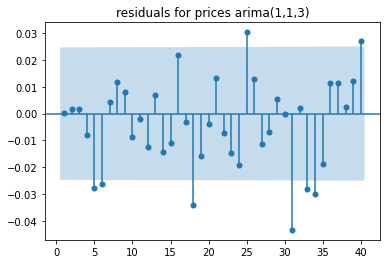

In [25]:
df['res_ar1_i1_ma3']=results_ar1_i1_ma3.resid
sgt.plot_acf(df.res_ar1_i1_ma3[1:],zero=False,lags=40)
plt.title('residuals for prices arima(1,1,3)')
plt.show()

In [26]:
## since 6th lag coefficient is higly significant so ARIMA(6,16) is the better choice and so we do hit and trial betwwen lot of ooptions and we found that ARIMA(5,1,1) and ARIMA(6,1,3) 

In [27]:
model_ar5_i1_ma1=ARIMA(df.market_value,order=(5,1,1))
results_ar5_i1_ma1=model_ar5_i1_ma1.fit(start_ar_lags=11)
model_ar6_i1_ma3=ARIMA(df.market_value,order=(6,1,3))
results_ar6_i1_ma3=model_ar6_i1_ma3.fit(start_ar_lags=13)

In [28]:
## we also call arima(1,1,3) to comapre all three here and choose the best one

In [29]:
print('arima(1,1,3):', results_ar1_i1_ma3.llf ,results_ar1_i1_ma3.aic)
print('arima(5,1,1):', results_ar5_i1_ma1.llf ,results_ar5_i1_ma1.aic)
print('arima(6,1,3):', results_ar6_i1_ma3.llf ,results_ar6_i1_ma3.aic)

arima(1,1,3): -34410.94117134848 68833.88234269696
arima(5,1,1): -34406.637913650644 68829.27582730129
arima(6,1,3): -34404.95889429994 68831.91778859988


In [30]:
## since llr value of arima(6,1,3) is highest and aic value being lowest so it is the better option from three
## sice arma(1,1,3) and arma(5,1,1) are nested inside arima(6,1,3) so need check the llr test for them for complete surity

In [31]:
llr_test(model_ar1_i1_ma3,model_ar6_i1_ma3,DF=5)

0.035

In [32]:
llr_test(model_ar5_i1_ma1,model_ar6_i1_ma3,DF=3)

0.34

In [33]:
##so this suggest that arima(5,1,1) is better model than arima(6,1,3) and arima(6,1,3) is better than arima(1,1,3)
## so finally choosing arima(5,1,1) as better option after llr test

## residual for arima(5,1,1)

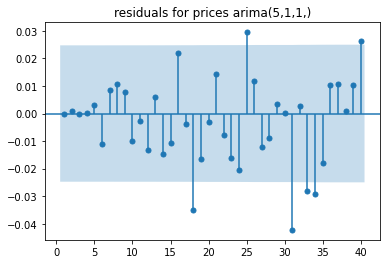

In [34]:
df['res_ar5_i1_ma1']=results_ar5_i1_ma1.resid
sgt.plot_acf(df.res_ar5_i1_ma1[1:],zero=False,lags=40)
plt.title('residuals for prices arima(5,1,1,)')
plt.show()

## Models with higher level of integration(d>1)

In [35]:
## we are doing this because we need to conifrm that d=1 was the stationary data 
## and to confirm this we will use 'delta' series(delta market_value) instead of market_value series and make arima(1,0,1) model and check its stationarity

In [36]:
df['delta_prices'] =df.market_value.diff(1)

In [37]:
model_delta_ar1_i0_ma1=ARIMA(df.delta_prices[1:],order=(1,0,1))
results_delta_ar1_i0_ma1=model_delta_ar1_i0_ma1.fit()
results_delta_ar1_i0_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 6276
Model:                     ARMA(1, 1)   Log Likelihood              -34417.629
Method:                       css-mle   S.D. of innovations             58.269
Date:                Tue, 01 Feb 2022   AIC                          68843.257
Time:                        13:14:15   BIC                          68870.235
Sample:                    01-10-1994   HQIC                         68852.605
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6751      0.581      1.161      0.246      -0.464       1.815
ar.L1.delta_prices     0.8343      0.077     10.770      0.000       0.682       0.986
ma.L1.delta_prices    -0.8690      0.070    -12.452      0.000      -1.006      -0.732
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1987           +0.0000j            1.1987            0.0000
MA.1            1.1507           +0.0000j            1.1507            0.0000
-----------------------------------------------------------------------------
"""

In [38]:
## results are similar to arima(1,1,1)

In [39]:
sts.adfuller(df['delta_prices'][1:])

(-35.59973234219259,
 0.0,
 5,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 68468.13611640701)

In [40]:
##hence results shows that d=1 is stationary, and we need not to go further additional layer like d=2,3,4...

In [41]:
## the purpose of integration is to reach the stationarity but here we reached at d=1 so no need of further integration

## ARIMAX

In [42]:
model_ar1_i1_ma1_Xspx=ARIMA(df.market_value,exog=df.spx,order=(1,1,1))
results_ar1_i1_ma1_Xspx=model_ar1_i1_ma1_Xspx.fit()
results_ar1_i1_ma1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 6276
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34417.374
Method:                       css-mle   S.D. of innovations             58.266
Date:                Tue, 01 Feb 2022   AIC                          68844.747
Time:                        13:14:17   BIC                          68878.469
Sample:                    01-10-1994   HQIC                         68856.431
                         - 01-29-2018                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4014      1.654     -0.243      0.808      -3.643       2.840
spx                      0.0008      0.001      0.697      0.485      -0.002       0.003
ar.L1.D.market_value     0.8324      0.078     10.734      0.000       0.680       0.984
ma.L1.D.market_value    -0.8672      0.070    -12.395      0.000      -1.004      -0.730
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2014           +0.0000j            1.2014            0.0000
MA.1            1.1531           +0.0000j            1.1531            0.0000
-----------------------------------------------------------------------------
"""

## SARIMAX

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [44]:
model_sarimax=SARIMAX(df.market_value,exog=df.spx,order=(1,0,1),seasonal_order=(2,0,1,5))
results_sarimax=model_sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 6277
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -33301.102
Date:                           Tue, 01 Feb 2022   AIC                          66616.205
Time:                                   13:14:27   BIC                          66663.417
Sample:                               01-07-1994   HQIC                         66632.563
                                    - 01-29-2018                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.5695      0.031     83.439      0.000       2.509       2.630
ar.L1          0.9997      0.000   2279.001      0.000       0.999       1.001
ma.L1         -0.2799      0.009    -32.292      0.000      -0.297      -0.263
ar.S.L5        0.9692      0.009    102.471      0.000       0.951       0.988
ar.S.L10       0.0305      0.009      3.382      0.001       0.013       0.048
ma.S.L5       -0.9992      0.004   -256.021      0.000      -1.007      -0.992
sigma2      2371.2529     25.359     93.506      0.000    2321.550    2420.956
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):              4463.71
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
df['returns']=df.market_value.pct_change(1)*100

In [46]:
df['sq_returns']=df.returns.mul(df.returns)

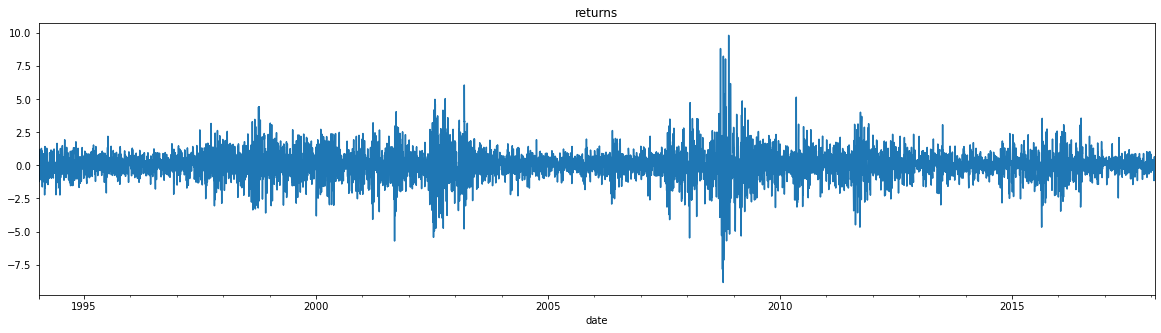

In [47]:
df.returns.plot(figsize=(20,5))
plt.title('returns')
plt.show()

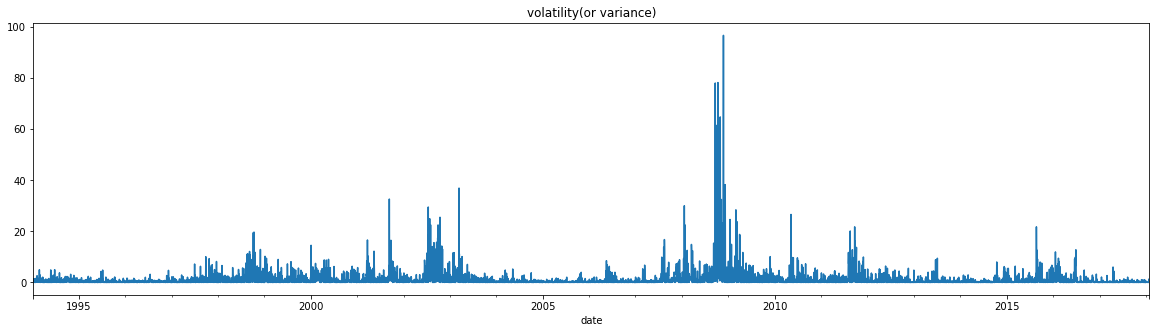

In [48]:
df.sq_returns.plot(figsize=(20,5))
plt.title('volatility(or variance)')
plt.show()

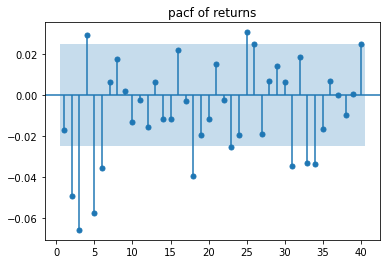

In [49]:
sgt.plot_pacf(df.returns[1:],lags=40,zero=False,method=('ols'))
plt.title('pacf of returns')
plt.show()

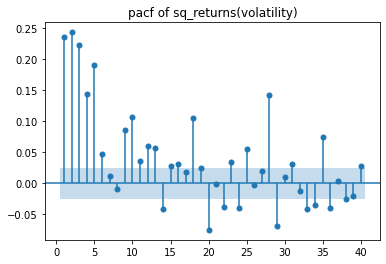

In [50]:
sgt.plot_pacf(df.sq_returns[1:],lags=40,zero=False,method=('ols'))
plt.title('pacf of sq_returns(volatility)')
plt.show()

In [51]:
## this shows that there is short term trend in variance as first 6 lags are significant 

## the arch model method

In [52]:
from arch import arch_model

In [53]:
model_arch1=arch_model(df.returns[1:])
results_arch1=model_arch1.fit()
results_arch1.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 16863680761.307117
Iteration:      2,   Func. Count:     15,   Neg. LLF: 694785802.0027294
Iteration:      3,   Func. Count:     23,   Neg. LLF: 8470.84211140752
Iteration:      4,   Func. Count:     29,   Neg. LLF: 8476.69225374964
Iteration:      5,   Func. Count:     35,   Neg. LLF: 8417.8308011268
Iteration:      6,   Func. Count:     41,   Neg. LLF: 8505.669210309847
Iteration:      7,   Func. Count:     47,   Neg. LLF: 8417.794849188569
Iteration:      8,   Func. Count:     53,   Neg. LLF: 8417.934653347469
Iteration:      9,   Func. Count:     59,   Neg. LLF: 8410.474242385859
Iteration:     10,   Func. Count:     64,   Neg. LLF: 8410.47393470983
Iteration:     11,   Func. Count:     69,   Neg. LLF: 8410.473929749041
Iteration:     12,   Func. Count:     73,   Neg. LLF: 8410.473929746735
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8410.473929749041
            Iterations: 12
     

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8410.47
Distribution:                  Normal   AIC:                           16828.9
Method:            Maximum Likelihood   BIC:                           16855.9
                                        No. Observations:                 6276
Date:                Tue, Feb 01 2022   Df Residuals:                     6275
Time:                        13:14:29   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0422  1.029e-02      4.102  4.089e-05 [2.205e-02,6.240e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0124  3.261e-03      3.804  1.426e-04 [6.012e-03,1.879e-02]
alpha[1]       0.0881  1.139e-02      7.737  1.019e-14   [6.580e-02,  0.110]
beta[1]        0.9017  1.283e-02     70.287      0.000     [  0.877,  0.927]
============================================================================

Covariance estimator: robust
"""

## simple arch model

In [54]:
model_arch1=arch_model(df.returns[1:],mean='Constant',vol='ARCH',p=1)
results_arch1=model_arch1.fit()
results_arch1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 38456.93802662019
Iteration:      2,   Func. Count:     13,   Neg. LLF: 14502.596709603778
Iteration:      3,   Func. Count:     20,   Neg. LLF: 9416.724763520728
Iteration:      4,   Func. Count:     26,   Neg. LLF: 9234.946373695788
Iteration:      5,   Func. Count:     30,   Neg. LLF: 9234.946357288656
Iteration:      6,   Func. Count:     33,   Neg. LLF: 9234.946357288776
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9234.946357288656
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -9234.95
Distribution:                  Normal   AIC:                           18475.9
Method:            Maximum Likelihood   BIC:                           18496.1
                                        No. Observations:                 6276
Date:                Tue, Feb 01 2022   Df Residuals:                     6275
Time:                        13:14:29   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0351  1.365e-02      2.569  1.021e-02 [8.308e-03,6.182e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.8150  3.470e-02     23.489 5.224e-122 [  0.747,  0.883]
alpha[1]       0.3853  4.617e-02      8.346  7.039e-17 [  0.295,  0.476]
========================================================================

Covariance estimator: robust
"""

In [55]:
model_arch2=arch_model(df.returns[1:],mean='Constant',vol='ARCH',p=2)
results_arch2=model_arch2.fit()
results_arch2.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 44072.66593926052
Iteration:      2,   Func. Count:     16,   Neg. LLF: 9417.435689106684
Iteration:      3,   Func. Count:     23,   Neg. LLF: 10357064.350324173
Iteration:      4,   Func. Count:     31,   Neg. LLF: 9204.448887981149
Iteration:      5,   Func. Count:     38,   Neg. LLF: 8982.519896191176
Iteration:      6,   Func. Count:     43,   Neg. LLF: 8982.519223934534
Iteration:      7,   Func. Count:     47,   Neg. LLF: 8982.519223934636
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8982.519223934534
            Iterations: 7
            Function evaluations: 47
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -8982.52
Distribution:                  Normal   AIC:                           17973.0
Method:            Maximum Likelihood   BIC:                           18000.0
                                        No. Observations:                 6276
Date:                Tue, Feb 01 2022   Df Residuals:                     6275
Time:                        13:14:29   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0425  1.184e-02      3.586  3.354e-04 [1.926e-02,6.568e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.6220  2.921e-02     21.299 1.164e-100 [  0.565,  0.679]
alpha[1]       0.2389  3.248e-02      7.356  1.892e-13 [  0.175,  0.303]
alpha[2]       0.2695  3.205e-02      8.408  4.183e-17 [  0.207,  0.332]
========================================================================

Covariance estimator: robust
"""

In [56]:
model_arch3=arch_model(df.returns[1:],mean='Constant',vol='ARCH',p=3)
results_arch3=model_arch3.fit()
results_arch3.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 51546.11885632489
Iteration:      2,   Func. Count:     18,   Neg. LLF: 14511.420518474551
Iteration:      3,   Func. Count:     27,   Neg. LLF: 9999.798516422838
Iteration:      4,   Func. Count:     34,   Neg. LLF: 9043.11755670816
Iteration:      5,   Func. Count:     42,   Neg. LLF: 9023.142793703322
Iteration:      6,   Func. Count:     49,   Neg. LLF: 9022.31637332133
Iteration:      7,   Func. Count:     57,   Neg. LLF: 8768.068319688326
Iteration:      8,   Func. Count:     63,   Neg. LLF: 8768.068316136223
Iteration:      9,   Func. Count:     68,   Neg. LLF: 8768.068316136148
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8768.068316136223
            Iterations: 9
            Function evaluations: 68
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -8768.07
Distribution:                  Normal   AIC:                           17546.1
Method:            Maximum Likelihood   BIC:                           17579.9
                                        No. Observations:                 6276
Date:                Tue, Feb 01 2022   Df Residuals:                     6275
Time:                        13:14:29   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0462  1.125e-02      4.104  4.067e-05 [2.412e-02,6.824e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.4543  2.290e-02     19.840  1.354e-87 [  0.409,  0.499]
alpha[1]       0.1712  2.479e-02      6.906  4.981e-12 [  0.123,  0.220]
alpha[2]       0.2067  2.263e-02      9.131  6.786e-20 [  0.162,  0.251]
alpha[3]       0.2744  2.963e-02      9.261  2.017e-20 [  0.216,  0.332]
========================================================================

Covariance estimator: robust
"""

In [57]:
## this is hit and trial method until the coefficients become insignificant

## GARCH model

In [58]:
from arch import arch_model

In [59]:
df['returns'] =df.market_value.pct_change(1)*100

In [60]:
model_garch_1_1=arch_model(df.returns[1:], mean='Constant', vol='GARCH', p=1,q=1)
results_garch_1_1=model_garch_1_1.fit()
results_garch_1_1.summary()


Iteration:      1,   Func. Count:      6,   Neg. LLF: 16863680761.307117
Iteration:      2,   Func. Count:     15,   Neg. LLF: 694785802.0027294
Iteration:      3,   Func. Count:     23,   Neg. LLF: 8470.84211140752
Iteration:      4,   Func. Count:     29,   Neg. LLF: 8476.69225374964
Iteration:      5,   Func. Count:     35,   Neg. LLF: 8417.8308011268
Iteration:      6,   Func. Count:     41,   Neg. LLF: 8505.669210309847
Iteration:      7,   Func. Count:     47,   Neg. LLF: 8417.794849188569
Iteration:      8,   Func. Count:     53,   Neg. LLF: 8417.934653347469
Iteration:      9,   Func. Count:     59,   Neg. LLF: 8410.474242385859
Iteration:     10,   Func. Count:     64,   Neg. LLF: 8410.47393470983
Iteration:     11,   Func. Count:     69,   Neg. LLF: 8410.473929749041
Iteration:     12,   Func. Count:     73,   Neg. LLF: 8410.473929746735
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8410.473929749041
            Iterations: 12
     

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8410.47
Distribution:                  Normal   AIC:                           16828.9
Method:            Maximum Likelihood   BIC:                           16855.9
                                        No. Observations:                 6276
Date:                Tue, Feb 01 2022   Df Residuals:                     6275
Time:                        13:14:30   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0422  1.029e-02      4.102  4.089e-05 [2.205e-02,6.240e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0124  3.261e-03      3.804  1.426e-04 [6.012e-03,1.879e-02]
alpha[1]       0.0881  1.139e-02      7.737  1.019e-14   [6.580e-02,  0.110]
beta[1]        0.9017  1.283e-02     70.287      0.000     [  0.877,  0.927]
============================================================================

Covariance estimator: robust
"""

In [61]:
## this model outperforms arch model because of higher llr value and all coeffficients are significant, since this model also includes past value that is past variance along with past residuals square this model measures the best volatility comparing to arch model

## Higher lag GARCH MODEL

In [62]:
## Garch(1,1) outperforms higher order garch models in every situation so garch(1,1) is the best suited model for volatility, but lets see how higher order garch nodel performs

In [63]:
model_garch_1_2=arch_model(df.returns[1:], mean='Constant', vol='GARCH', p=1,q=2)
results_garch_1_2=model_garch_1_2.fit()
results_garch_1_2.summary()


Iteration:      1,   Func. Count:      7,   Neg. LLF: 252440729653994.9
Iteration:      2,   Func. Count:     17,   Neg. LLF: 204146649.2989454
Iteration:      3,   Func. Count:     25,   Neg. LLF: 12210.956784937176
Iteration:      4,   Func. Count:     33,   Neg. LLF: 8472.042049182764
Iteration:      5,   Func. Count:     40,   Neg. LLF: 8421.008955234884
Iteration:      6,   Func. Count:     47,   Neg. LLF: 8411.89824469785
Iteration:      7,   Func. Count:     53,   Neg. LLF: 8411.713652430357
Iteration:      8,   Func. Count:     60,   Neg. LLF: 8426.354920816095
Iteration:      9,   Func. Count:     67,   Neg. LLF: 8410.474338560463
Iteration:     10,   Func. Count:     73,   Neg. LLF: 8410.474019230227
Iteration:     11,   Func. Count:     79,   Neg. LLF: 8410.473931959052
Iteration:     12,   Func. Count:     85,   Neg. LLF: 8410.473929733595
Iteration:     13,   Func. Count:     90,   Neg. LLF: 8410.473929831052
Optimization terminated successfully    (Exit mode 0)
          

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8410.47
Distribution:                  Normal   AIC:                           16830.9
Method:            Maximum Likelihood   BIC:                           16864.7
                                        No. Observations:                 6276
Date:                Tue, Feb 01 2022   Df Residuals:                     6275
Time:                        13:14:30   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0422  1.029e-02      4.106  4.023e-05 [2.207e-02,6.239e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0124  3.147e-03      3.941  8.112e-05 [6.235e-03,1.857e-02]
alpha[1]       0.0881  1.374e-02      6.413  1.428e-10   [6.119e-02,  0.115]
beta[1]        0.9017      0.200      4.515  6.337e-06     [  0.510,  1.293]
beta[2]    5.4966e-13      0.190  2.889e-12      1.000     [ -0.373,  0.373]
============================================================================

Covariance estimator: robust
"""

In [64]:
## since beta 2 p-value is equal to 1 , this is insignificant hence garch(1,1) is best suited model